# 시계열 데이터
- quandl
- Prophet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.unicode_minus'] = False

## 주가 다운로드 라이브러리

In [5]:
!pip install quandl

In [8]:
import quandl
from statsmodels.tsa.seasonal import seasonal_decompose

In [146]:
df_gold = pd.read_excel("./Gold Prices.xlsx", sheet_name=9)

In [154]:
df_gold[:20]

,Last updated 16-10-2017,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Gold price - Key Currencies,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Gold price - Major producer countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,National Currency Unit per troy ounce,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,National Currency Unit per troy ounce,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,USD,EUR,JPY,GBP,CAD,CHF,...,EUR,RUB,USD,ZAR,CNY,CAD,AUD,G5 CCY,PROD IDX,CONS IDX
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,Name,US dollar,Euro,Japanese yen,Pound sterling,Canadian dollar,Swiss franc,...,Euro,Russian ruble,US dollar,South African rand,Chinese renmimbi,Canadian dollar,Australian dollar,G5 currency index,Producer index,Consumer index
8,NaN,NaN,NaN,1978-12-29 00:00:00,226,137.06309,NaN,110.70301,NaN,NaN,...,137.06309,NaN,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,1979-01-01 00:00:00,226,137.06309,NaN,110.70301,NaN,NaN,...,137.06309,NaN,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
print(df_gold.shape)
df = df_gold[['Unnamed: 3','Unnamed: 20']][9:]
df.columns = ['date','KRW']
df.to_csv("gold_price.csv", index=False)

(10129, 31)


In [151]:
!tail 'gold_price.csv'

2017-10-02 00:00:00,1458832.052
2017-10-03 00:00:00,1456026.001
2017-10-04 00:00:00,1459462.051
2017-10-05 00:00:00,1459748.388
2017-10-06 00:00:00,1445202.221
2017-10-09 00:00:00,1464616.125
2017-10-10 00:00:00,1465932.473
2017-10-11 00:00:00,1463492.012
2017-10-12 00:00:00,1462304.648
2017-10-13 00:00:00,1467183.191


In [152]:
df = pd.read_csv("gold_price.csv")
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)

<AxesSubplot:title={'center':'Gold Price'}, xlabel='date'>

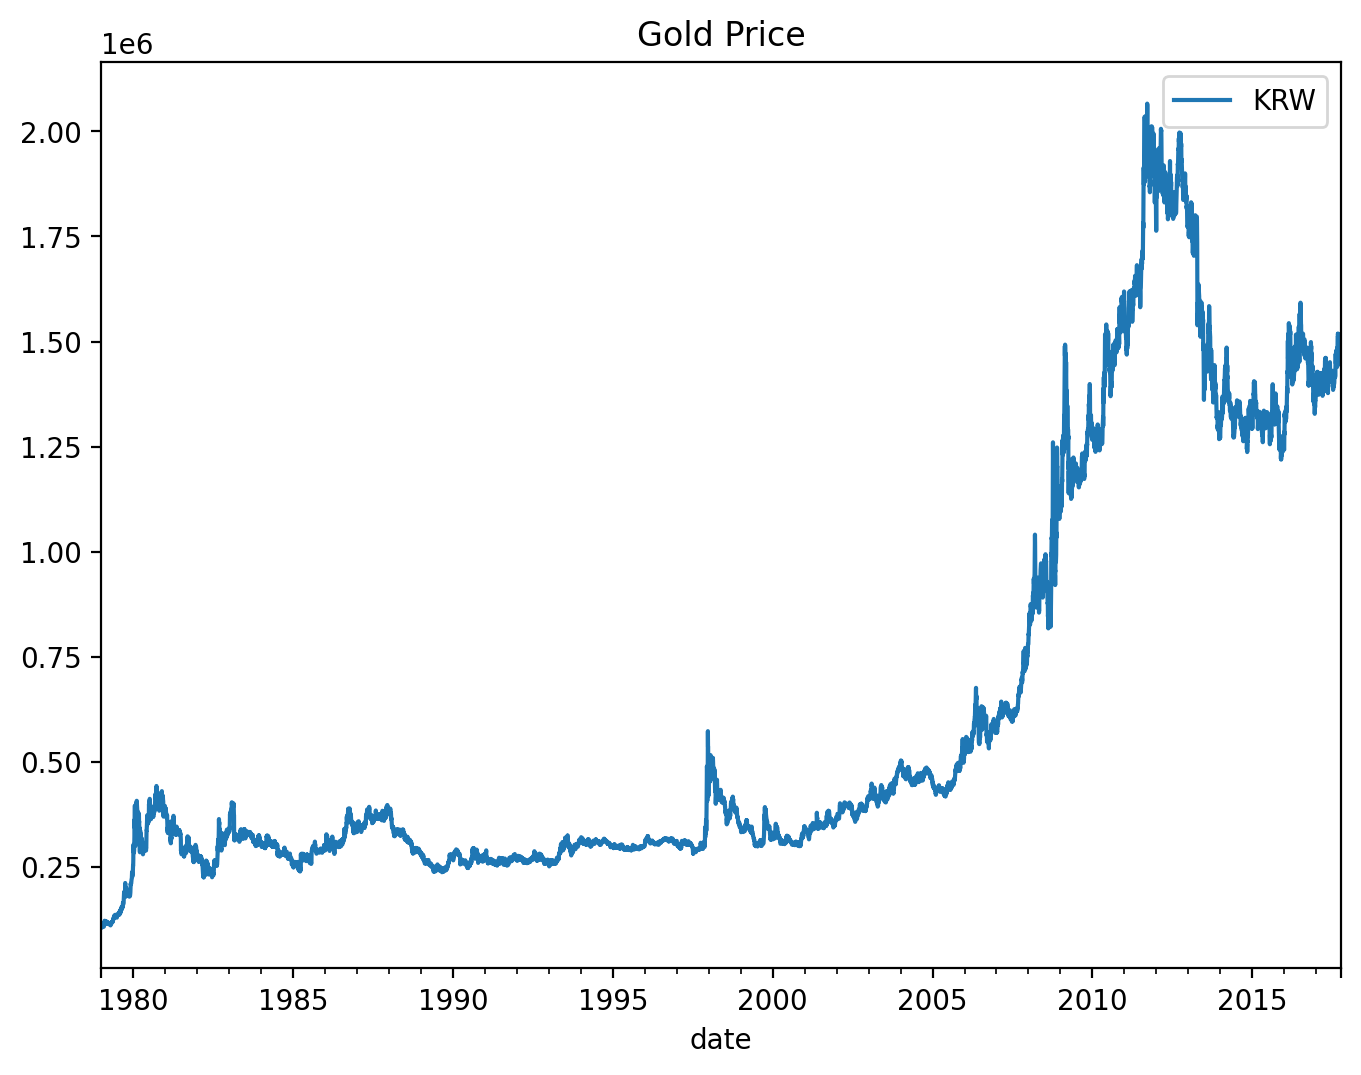

In [153]:
df.plot(title='Gold Price')

In [140]:
df = df.resample('M').last()

In [141]:
from datetime import datetime
time2005 =  datetime.strptime('2005-1-1', '%Y-%m-%d')
df = df[df.index > time2005]

In [142]:
df

,KRW
date,
2005-01-31,440219.469
2005-02-28,432648.446
2005-03-31,437413.311
2005-04-30,433627.083
2005-05-31,422980.021
...,...
2017-05-31,1401543.266
2017-06-30,1425215.794
2017-07-31,1400565.720


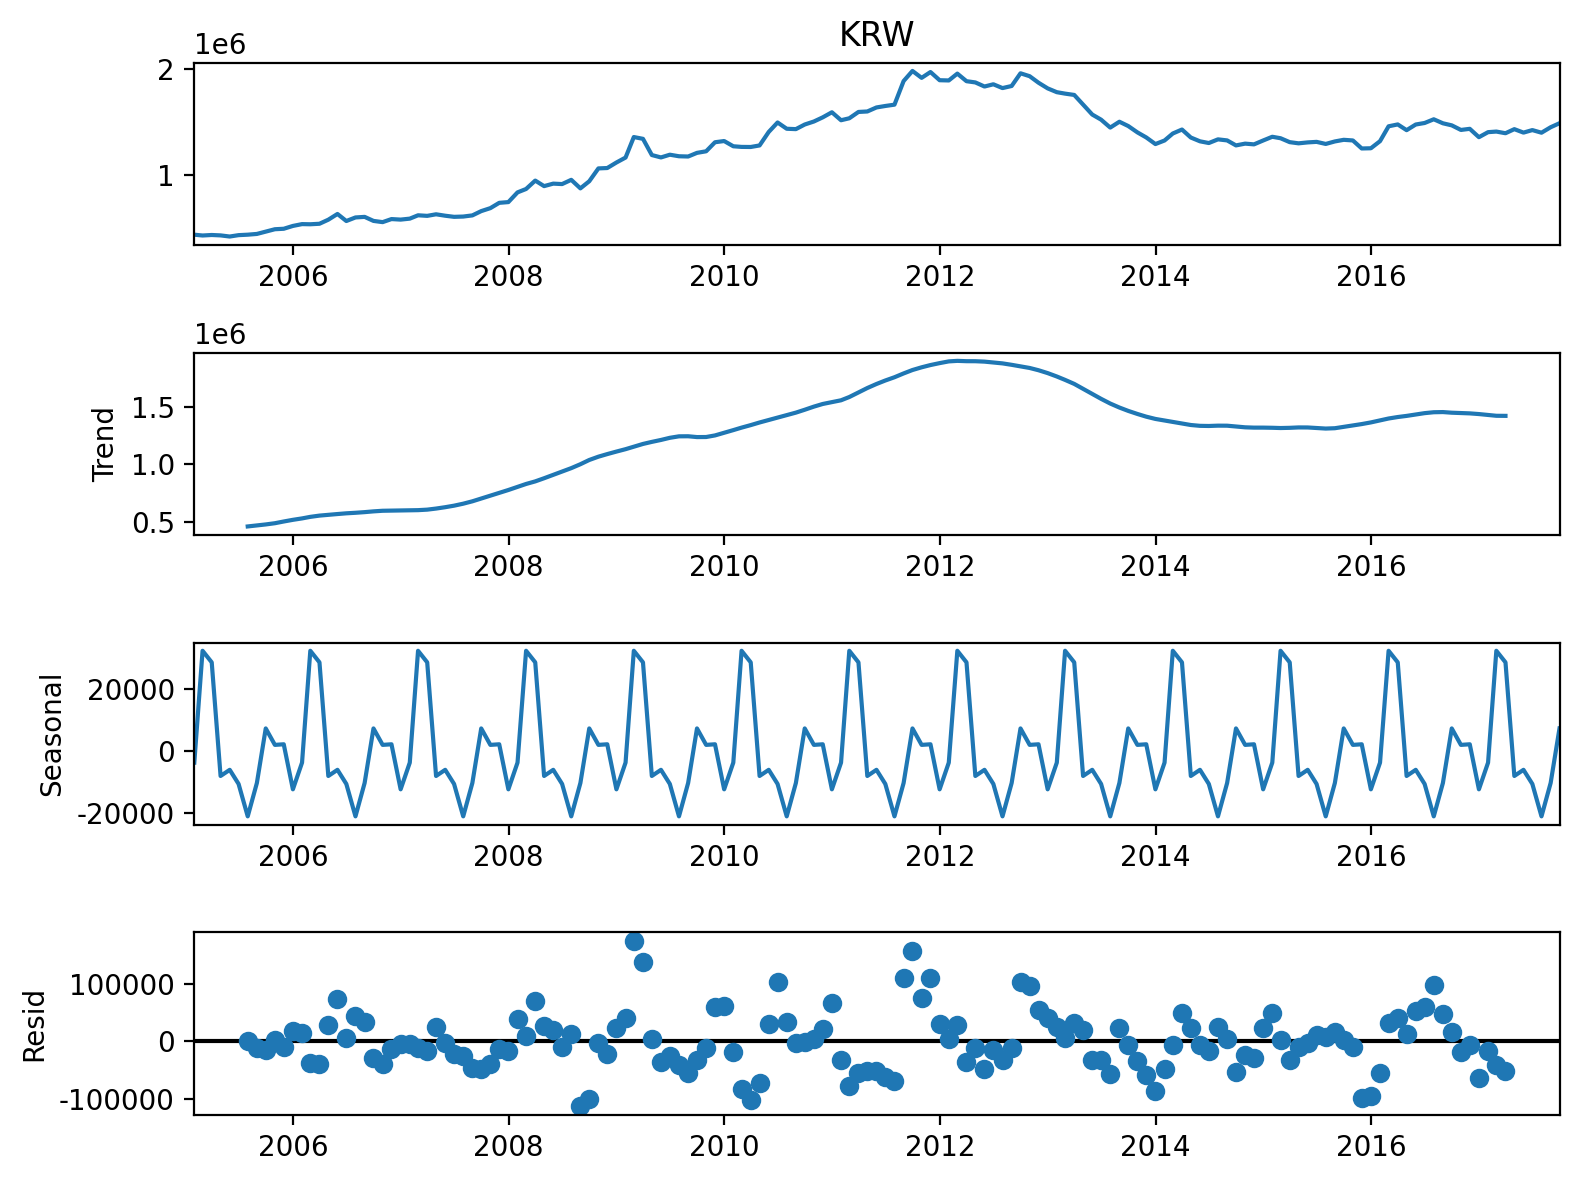

In [143]:
decomposition = seasonal_decompose(df.KRW)
decomposition.plot()
plt.show()

## Prophet 사용

- 설치: !conda install -c conda-forge fbprophet
- colab 에서 실행

In [100]:
from fbprophet import prophet

ModuleNotFoundError: No module named 'fbprophet'

### 티커 보기